# Introduction to using Jupyter Notebooks with the Bonsai API
Use this notebook to get basic information from the Bonsai API such as BRAIN versions, training data, and other details. Example outputs are shown from a test account to show what you should expect to see from the given inputs.

Objectives of this notebook:

* empower your training with notebooks
* get raw data from the Bonsai API
* do advanced analysis of training data
* visualize results with feature rich graphs

For more details and other options on the API endpoints used here see: http://docs.bons.ai/references/api-reference.html#api-overview

## Setup your notebook
In this first step you will install any necessary Python packages you don't already have. These packages are necessary for data analysis and ploting.

In [ ]:
!pip install pandas seaborn matplotlib requests plotly python-dateutil cufflinks

Next, these installed packages will be imported to the notebook as various variable names. matplotlib is also set to be used inline and then a theme is set for for clear reading.

In [ ]:
import pandas as pd # for Dataframes
import seaborn as sns # for matplotlib theme
import matplotlib.pyplot as plt
import requests, plotly, dateutil
import cufflinks as cf # ties plotly and dataframes
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

# setting seaborn theme for matplotlib
sns.set()
sns.set_context("talk")
# to plot figures in the notebook
%matplotlib inline 
# for high resolution plots hd displays (macbook pros)
%config InlineBackend.figure_format = 'retina'

Fill in your private AccessKey and your username below. From now on this notebook will be accessing your account through the Bonsai API. You can change the `rootUrl` if you've been directed to use a site other than `beta.bons.ai`. Your AccessKey can be found here: https://beta.bons.ai/accounts/settings/key

In [3]:
# FILL IN BELOW
username = 'YourUserName'
AccessKey = 'YourAccessKey'

rootUrl = 'https://api.bons.ai' # this is the API URL for beta.bons.ai

## List all BRAINs for user
An easy way to test that the username and AccessKey are input correctly is to list out all overview details for each BRAIN for the given user. The date (timestamp), name, state, url, and version of each BRAIN is output in a table.

In [9]:
endpoint = '/v1/' + username
url = rootUrl + endpoint # define url
print("The URL we are listing all BRAINs for: " + url)

r = requests.get(url,headers={'Authorization': AccessKey})
data = r.json() # retrieve data from json format into a dictionary
datadf = pd.DataFrame(data['brains']) # import date from dict to Dataframe for ease of data analysis
datadf # show dataframe

The URL we are listing all BRAINs for: https://api.bons.ai/v1/KSmith


,last_modified,name,state,url,version
0,2018-01-01T19:58:29.600000Z,cartpole-jupyter,In Progress,/v1/KSmith/cartpole-jupyter,3
1,2018-01-01T20:07:17.643000Z,energyplus,Stopped,/v1/KSmith/energyplus,1
2,2018-01-01T20:02:52.456000Z,mountaincar-jupyter,In Progress,/v1/KSmith/mountaincar-jupyter,1


### List of versions for specified BRAIN
Another thing you can do with this general endpoint is to output specific details about the specified BRAIN. Below, the table displays the URL for each version of the specified BRAIN, which you need to fill out.

In [10]:
# FILL IN BELOW
brainname = 'cartpole-jupyter' # use a BRAIN name listed in the previous table

endpoint = '/v1/'+ username +'/'+ brainname
url = rootUrl + endpoint
print("The URL for the specified BRAIN: " + url)

r = requests.get(url,headers={'Authorization':AccessKey})
data = r.json()
datadf = pd.DataFrame(data['versions'])
datadf # show dataframe

The URL for the specified BRAIN: https://api.bons.ai/v1/KSmith/cartpole-jupyter


,url,version
0,/v1/KSmith/cartpole-jupyter/3,3
1,/v1/KSmith/cartpole-jupyter/2,2
2,/v1/KSmith/cartpole-jupyter/1,1


## Retrieve metrics data from a BRAIN
Now we can get real data from a trained BRAIN! This section takes a specified BRAIN version and displays training episode values and test episode (episodes without discovery noise) values. This data is what is displayed in the graphs on the BRAIN Details page of the Bonsai Platform.

### Training episode value data

In [24]:
# FILL IN BELOW
brainversion = 'latest' # can be latest version 'latest' or a number e.g. '3' for version 3

metrics = '/metrics/episode_value' 
endpoint = '/v1/' + username + '/' + brainname + '/' + brainversion + metrics
url = rootUrl + endpoint
print("The URL for the specified BRAIN version: " + url)

r = requests.get(url,headers={'Authorization': AccessKey})
data = r.json()
datadf = pd.DataFrame(data)
datadf.tail() # tail displays only the last 5 lines of the output

The URL for the specified BRAIN version: https://api.bons.ai/v1/KSmith/cartpole-jupyter/latest/metrics/episode_value


,concept,episode,iteration,lesson,time,value
3233,balance,3234,430163,balancing,2018-01-01T20:56:26.429748992Z,596
3234,balance,3235,430521,balancing,2018-01-01T20:56:29.11960704Z,359
3235,balance,3236,431266,balancing,2018-01-01T20:56:33.736923904Z,744
3236,balance,3237,431666,balancing,2018-01-01T20:56:36.642646016Z,399
3237,balance,3238,431745,balancing,2018-01-01T20:56:37.13007488Z,76


## Plot episode reward vs episode index
To plot all episode reward values vs episode index.

Visualization rich tools like plotly may hit the default data rate limit of Jupyter Notebook. This can be solved by launching the Jupyter Notebook App by setting a higher data rate limit by starting it with `jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000`.

In [25]:
datadf['value'].iplot(
    xTitle='episode index',
    yTitle='Episode reward',
    title='Episode reward vs episode index',
    kind='scatter',
    mode='markers',
    size=5,
)

## Plot mean episode reward vs Episode index
We compute a rolling average of the episode reward to examine the general trend of the training episode data.

Text(0,0.5,'mean episode reward')

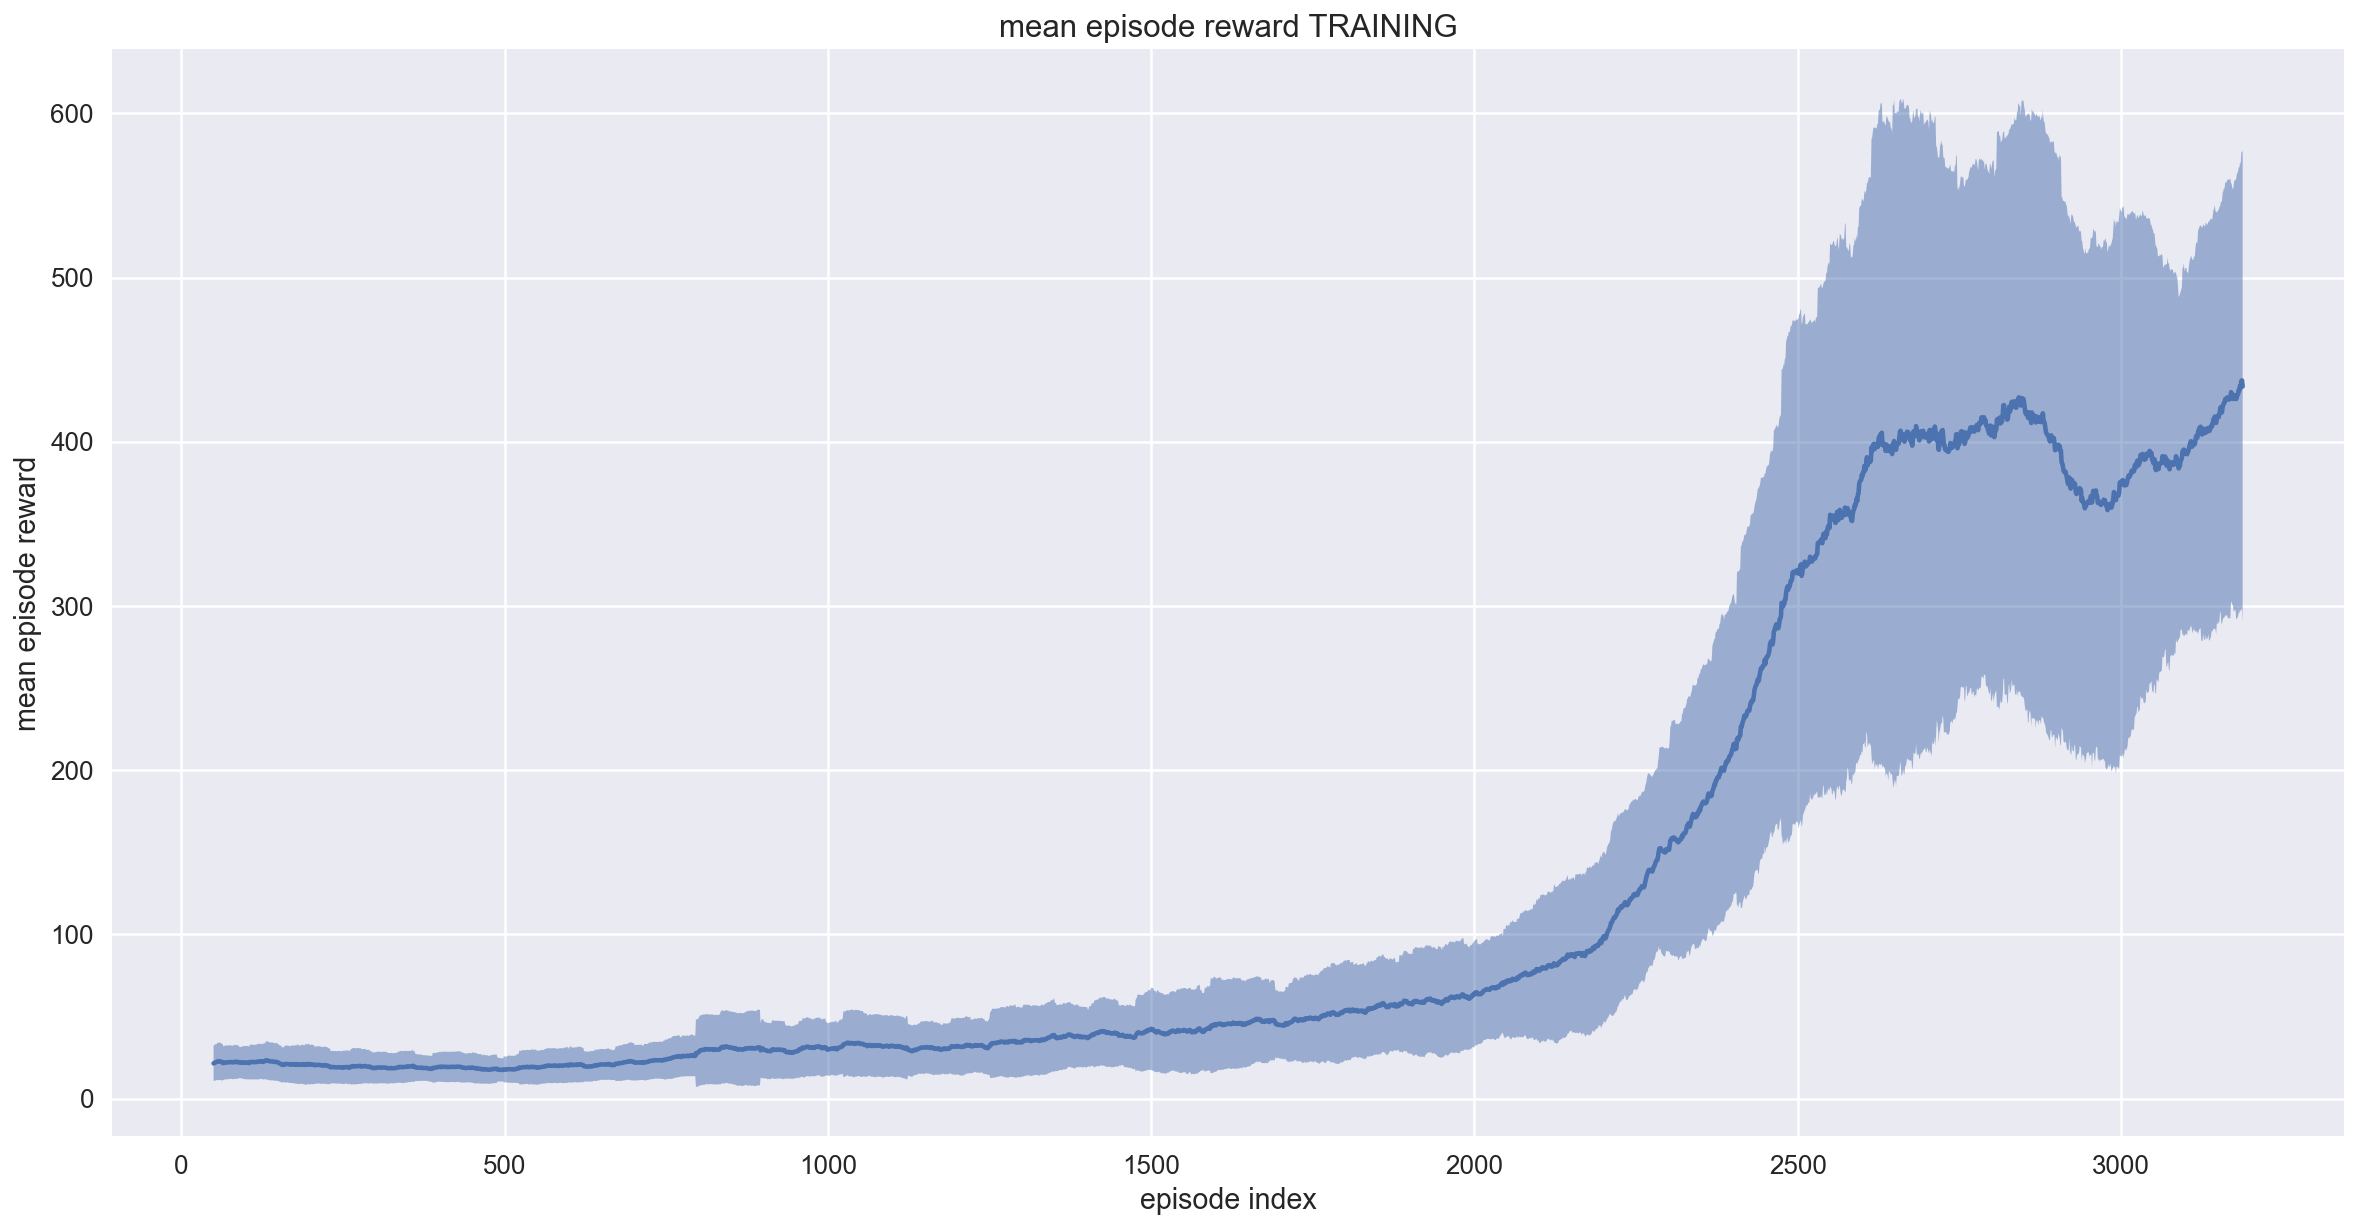

In [26]:
mean_reward = datadf['value'].rolling(100,center = True).mean().values # compute rolling mean
std_reward = datadf['value'].rolling(100,center = True).std().values # compute rolling standard deviation
episode_index = datadf['value'].index

# plot it!
fig, ax = plt.subplots(1,figsize=(20,10))
plt.figure(figsize=(3,4))
ax.plot(episode_index,mean_reward)# , label='mean population 1')
ax.fill_between(episode_index, mean_reward+std_reward, mean_reward-std_reward, alpha=0.5)
ax.set_title('mean episode reward TRAINING')
#ax.legend(loc='upper left')
ax.set_xlabel('episode index')
ax.set_ylabel('mean episode reward')

### Test episode data

On the concepts graph you will notice there is a display of which concept is currently training and its status and plotted are episode reward and average reward vs. training iterations. The current episode reward and the training time per concept for this version of the BRAIN are shown to the right.

This graph shows your BRAIN’s performance during training. After every 20 training episodes, the system runs a test episode. A test episode is the same as running the simulation in prediction mode after training has stopped - it runs without exploration.The dots indicate individual rewards achieved by each of these test episodes. The smoothed reward is the average of the 10 previous such rewards. The x axis is the total number of training iterations before each test episode, which is the number of state transitions and rewards that the BRAIN has had to learn from.

In [27]:
# FILL IN BELOW
brainversion = 'latest' # can be latest version 'latest' or a number e.g. '3' for version 3

metrics = '/metrics/test_pass_value' 
endpoint = '/v1/' + username + '/' + brainname + '/' + brainversion + metrics
url = rootUrl + endpoint
print("The URL for the specified BRAIN version: " + url)

r = requests.get(url,headers={'Authorization': AccessKey})
data = r.json()
datadf = pd.DataFrame(data)
datadf.tail() # tail displays only the last 5 lines of the output

The URL for the specified BRAIN version: https://api.bons.ai/v1/KSmith/cartpole-jupyter/latest/metrics/test_pass_value


,concept,episode,iteration,lesson,time,value
156,balance,157,389054,balancing,2018-01-01T20:51:21.43070208Z,542
157,balance,158,398541,balancing,2018-01-01T20:52:37.673246976Z,582
158,balance,159,407291,balancing,2018-01-01T20:53:38.184873216Z,545
159,balance,160,415673,balancing,2018-01-01T20:54:46.881218048Z,569
160,balance,161,424258,balancing,2018-01-01T20:55:48.064784128Z,546


In [28]:
datadf[['iteration','value']].iplot(
    x='iteration',
    y='value',
    xTitle='Iteration index',
    yTitle='Episode reward',
    title='Test episode data',
    kind='scatter',
    mode='markers',
    size=5,
)

### Average over 10 rewards for test passes

We compute a mean of the previous 10 rewards to get the equivalent of the training graph seen on the BRAIN Details page.

Text(0,0.5,'Episode reward')

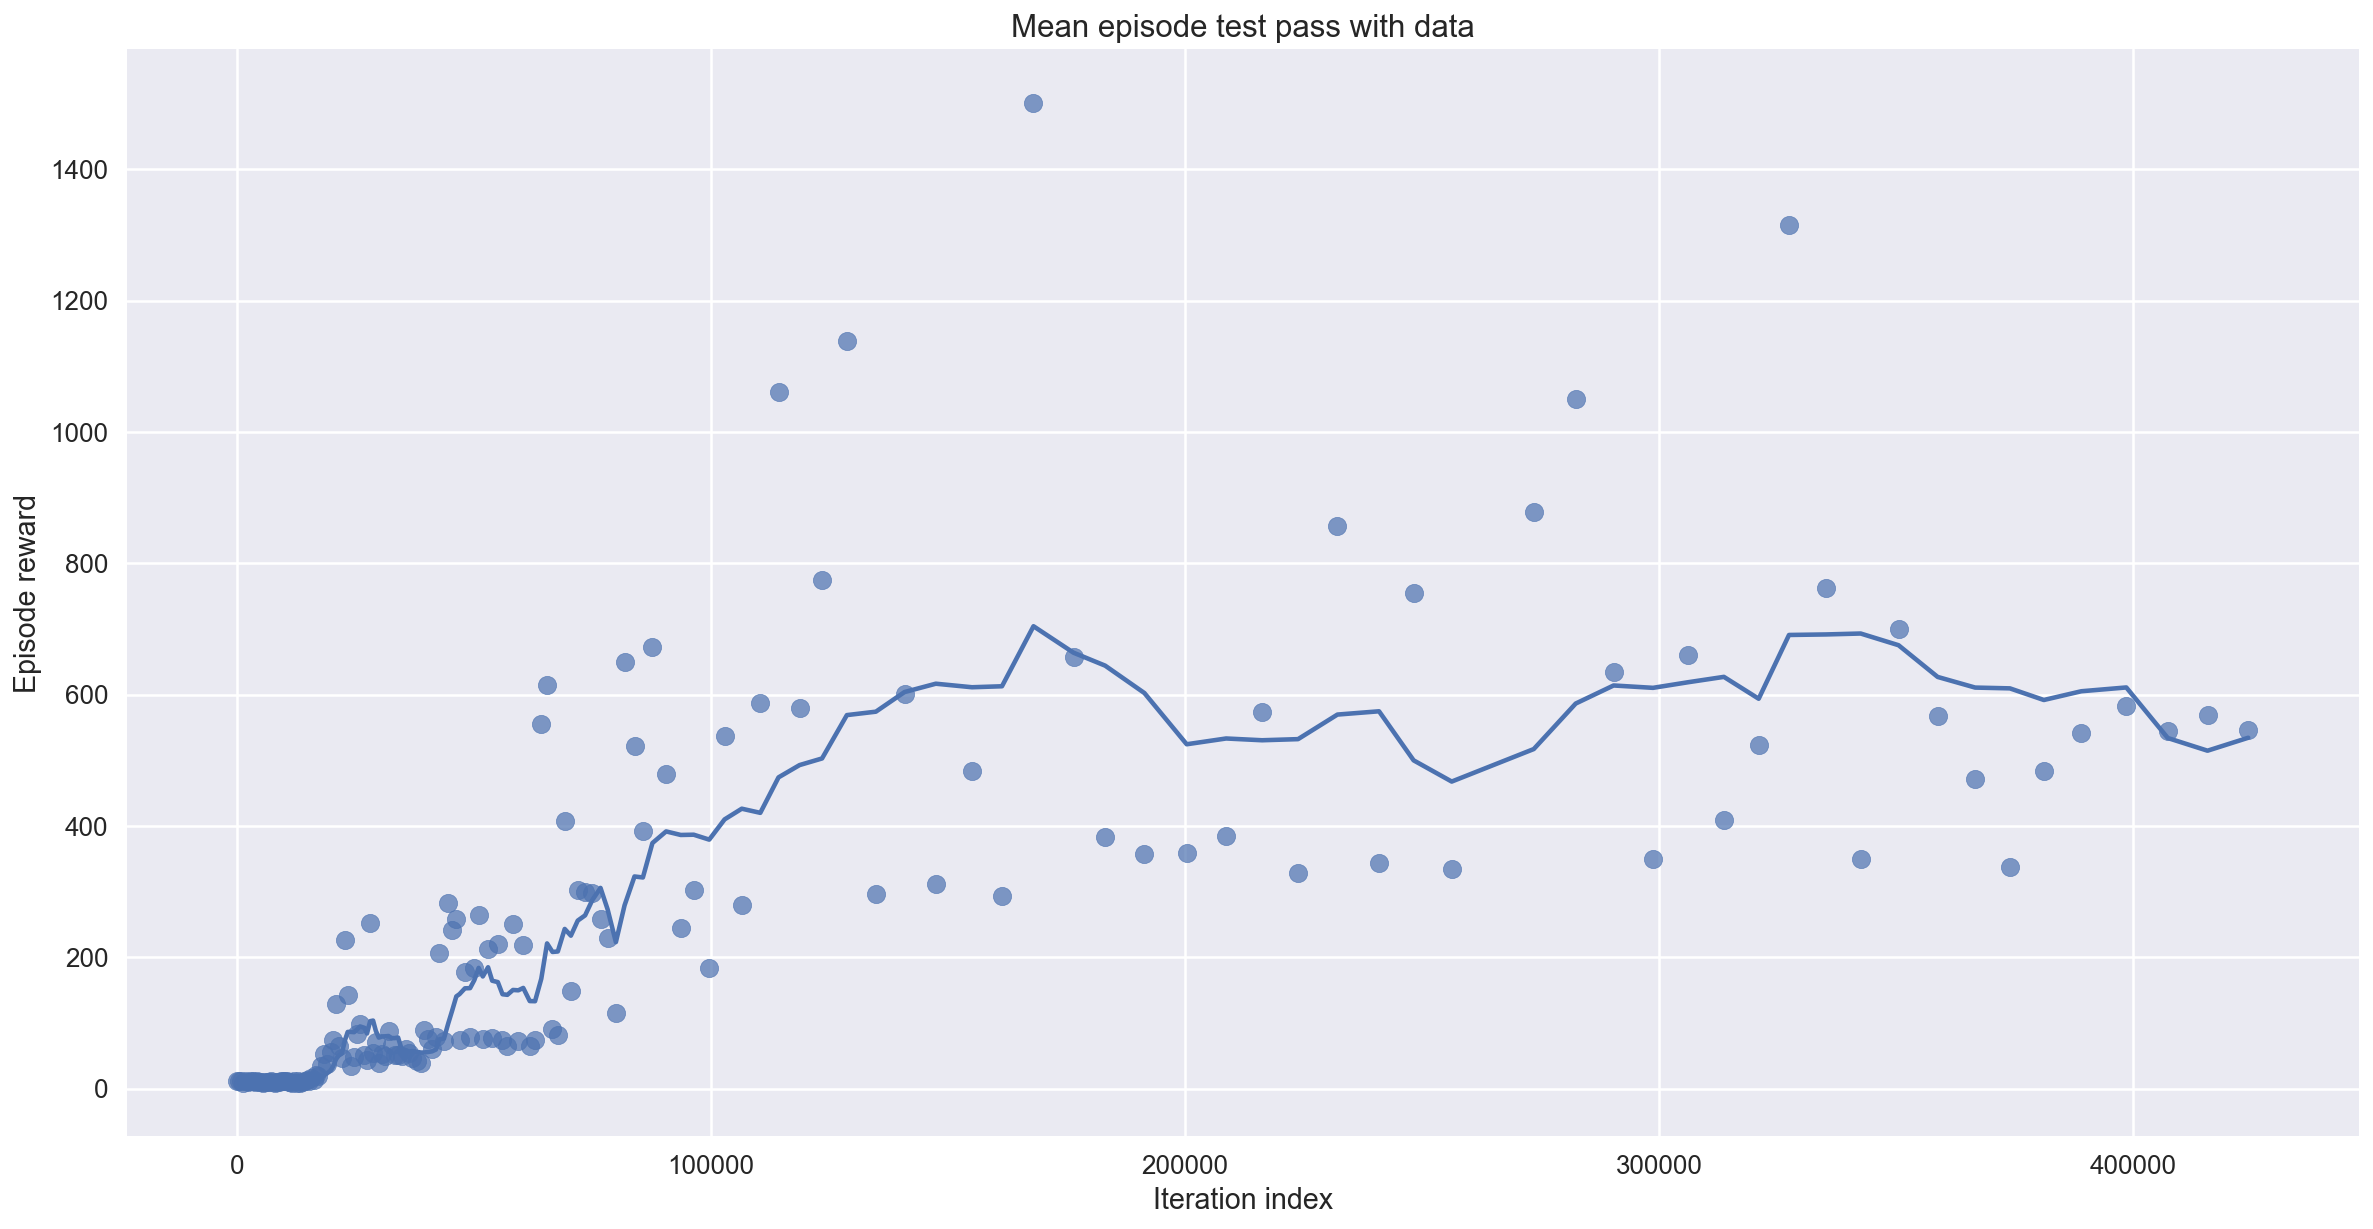

In [29]:
mean_reward = datadf['value'].rolling(10).mean().values # compute rolling mean
iteration_index = datadf['iteration']

# plot it!
fig, ax = plt.subplots(1,figsize=(20,10))
plt.figure(figsize=(3,4))
ax.plot(iteration_index,mean_reward)# , label='mean population 1') we're plotting 
ax.scatter(iteration_index,datadf['value'],alpha=0.7)
ax.set_title('Mean episode test pass with data')
ax.set_xlabel('Iteration index')
ax.set_ylabel('Episode reward')

# Next Steps

Now that you have accessed the Bonsai API and raw data from the BRAINs you have trained on the platform, you should now be able experiment with getting data from your simulator through logging, and familiarize yourself with reward shaping and experiementing with this training data.

Simulator logging: http://docs.bons.ai/references/api-reference.html#simulator-logs

Reward shaping training video: https://youtu.be/0R3PnJEisqk